In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.metrics import silhouette_score  

In [2]:
df=pd.read_excel('D:/Datasets/Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Min value is negative for quantity and UnitPrice that implies items were returned
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df['Country'].value_counts().head(10)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

<AxesSubplot:>

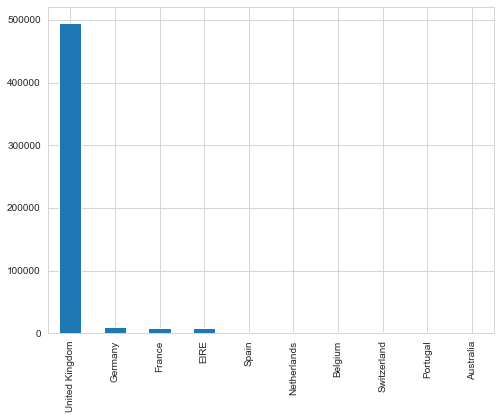

In [8]:
plt.figure(figsize=(8,6))
df['Country'].value_counts().head(10).plot.bar()

In [9]:
df['CustomerID'].nunique()

4372

In [10]:
##It is seen that only 10 out of 4000+ customers are responsible for 10% of total orders. These must be the wholesale customers of the retail store
(df['CustomerID'].value_counts()*100/sum(df['CustomerID'].value_counts())).cumsum().head(15)

17841.0     1.962249
14911.0     3.413228
14096.0     4.673708
12748.0     5.814728
14606.0     6.498553
15311.0     7.110850
14646.0     7.623350
13089.0     8.079807
13263.0     8.492020
14298.0     8.895138
15039.0     9.265809
14156.0     9.614850
18118.0     9.930462
14159.0    10.228376
14796.0    10.514737
Name: CustomerID, dtype: float64

In [11]:
#The count of unique stock unit ids and their descriptions should have matched but they do not. This implies some stock units might have more than one descriptions
print('Number of Unique item stock codes :',df['StockCode'].nunique())
print('Number of Unique item description :',df['Description'].nunique())

Number of Unique item stock codes : 4070
Number of Unique item description : 4223


In [12]:
df1 = df.groupby(["StockCode","Description"]).count().reset_index()

In [13]:
# It  inferes that there are more than one Description for a Stockcode.
df1['StockCode'].value_counts()[df1['StockCode'].value_counts()>1].head()

20713    8
23084    7
85175    6
21830    6
23343    5
Name: StockCode, dtype: int64

In [14]:
df=df[df['Country']=='United Kingdom']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df['Amount']=df['Quantity']*df['UnitPrice']
df['Amount'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Amount, dtype: float64

In [16]:
df=df[df['Amount']>=0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487620 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    487620 non-null  object        
 1   StockCode    487620 non-null  object        
 2   Description  486166 non-null  object        
 3   Quantity     487620 non-null  int64         
 4   InvoiceDate  487620 non-null  datetime64[ns]
 5   UnitPrice    487620 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      487620 non-null  object        
 8   Amount       487620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [18]:
df=df[~df['CustomerID'].isnull()]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
 8   Amount       354345 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


In [20]:
max_date=df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:49:00')

In [21]:
df['Recency']=max_date-df['InvoiceDate']
df['Recency']=df['Recency'].dt.days

In [22]:
## Recency
df_recency=df.groupby(['CustomerID'])['Recency'].min()
df_recency.reset_index().head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2


In [23]:
## Frequency
df_frequency=df.groupby(['CustomerID'])['InvoiceNo'].count()
df_recency.reset_index().head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2


In [24]:
##Monetary
df_Monetary=df.groupby(['CustomerID'])['Amount'].sum()
df_Monetary.reset_index().head()

,CustomerID,Amount
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [25]:
rfm=pd.merge(df_recency,df_frequency,on='CustomerID',how='inner')

In [26]:
rfm=pd.merge(rfm,df_Monetary,on='CustomerID',how='inner')
rfm=rfm.reset_index()
rfm.head()

,CustomerID,Recency,InvoiceNo,Amount
0,12346.0,325,1,77183.60
1,12747.0,1,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,2,59,942.34


<AxesSubplot:>

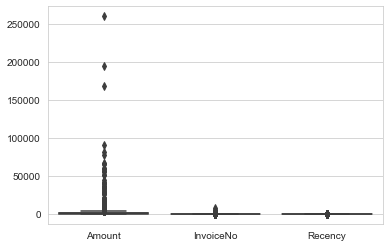

In [27]:
## Outlier Analysis

attributes = ['Amount','InvoiceNo','Recency']
sns.boxplot(data = rfm[attributes], orient="v")

In [28]:
# Removing Outliers from Amount
Q1=rfm['Amount'].quantile(0.25)
Q3=rfm['Amount'].quantile(0.75)
IQR=Q3-Q1
rfm=rfm[(rfm['Amount']>=Q1-1.5*IQR) & (rfm['Amount']<=Q3+ 1.5*IQR)]

#Removing Outliers from Frequency
Q1=rfm['InvoiceNo'].quantile(0.25)
Q3=rfm['InvoiceNo'].quantile(0.75)
IQR=Q3-Q1
rfm=rfm[(rfm['InvoiceNo']>=Q1-1.5*IQR) & (rfm['InvoiceNo']<=Q3+ 1.5*IQR)]

# Removing Outliers from Recency
Q1 = rfm['Recency'].quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
rfm_df = rfm[['Amount', 'InvoiceNo', 'Recency']]
scaler=StandardScaler()
rfm_scaler=scaler.fit_transform(rfm_df)

In [31]:
rfm_scaler.shape

(3308, 3)

In [32]:
rfm_scaler=pd.DataFrame(rfm_scaler,columns=['Amount', 'InvoiceNo', 'Recency'])
rfm_scaler.head()

,Amount,InvoiceNo,Recency
0,0.253416,0.324296,-0.990135
1,-0.941627,-0.969434,1.072370
2,0.262615,0.006966,-0.325441
3,1.402803,-0.993844,-0.286341
4,-0.513470,-0.505644,-0.432965


In [33]:
from sklearn.cluster import KMeans

In [34]:
# K means Clustering
kmeans=KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

In [35]:
y_predict=kmeans.fit_predict(rfm_scaler)
y_predict

array([0, 2, 0, ..., 2, 0, 1])

In [36]:
##Elbow Curve
ec = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaler)
    
    ec.append(kmeans.inertia_)


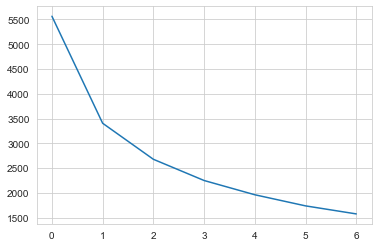

In [37]:
plt.plot(ec)

In [43]:
## Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaler)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaler, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4299463618122265
For n_clusters=3, the silhouette score is 0.4348940760867626
For n_clusters=4, the silhouette score is 0.4062721176024223
For n_clusters=5, the silhouette score is 0.4067663499349157
For n_clusters=6, the silhouette score is 0.3600372422504501
For n_clusters=7, the silhouette score is 0.3333450129007348
For n_clusters=8, the silhouette score is 0.34057076849980655


In [108]:
# Final Model with K=3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans

KMeans(max_iter=50, n_clusters=3)

In [109]:
y_predict=kmeans.fit_predict(rfm_scaler)
y_predict

array([0, 2, 0, ..., 2, 0, 1])

In [110]:
rfm['Cluster_id']=y_predict
rfm.head()

,CustomerID,Recency,InvoiceNo,Amount,Cluster_id
4,12820.0,2,59,942.34,0
5,12821.0,213,6,92.72,2
6,12822.0,70,46,948.88,0
7,12823.0,74,5,1759.50,0
8,12824.0,59,25,397.12,0


<AxesSubplot:xlabel='Cluster_id', ylabel='Amount'>

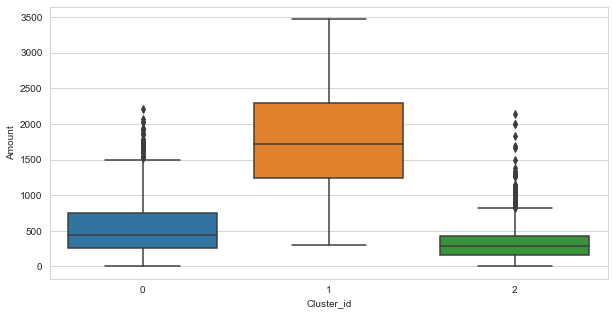

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Cluster_id',y='Amount',data=rfm)

<AxesSubplot:xlabel='Cluster_id', ylabel='InvoiceNo'>

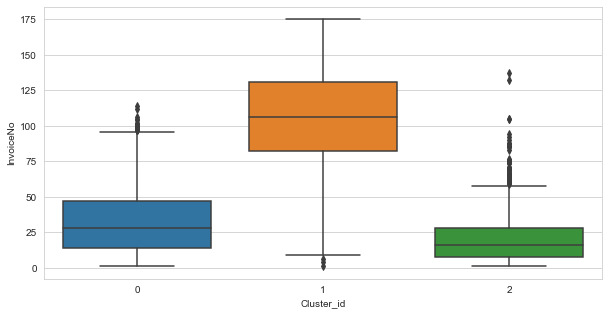

In [112]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Cluster_id', y='InvoiceNo', data=rfm)

<AxesSubplot:xlabel='Cluster_id', ylabel='Recency'>

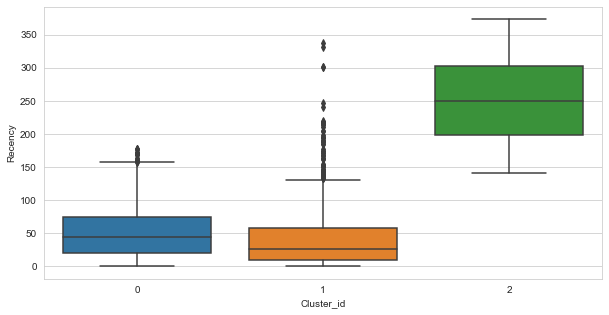

In [113]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Cluster_id', y='Recency', data=rfm)